In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
%matplotlib inline

In [2]:
# class the structure of neural network
class Model(nn.Module):
    def __init__(self, in_features=4,h1=8,h2=9,out_features=3):
        super().__init__()
        self.fc1 = nn.Linear(in_features, h1)
        self.fc2 = nn.Linear(h1, h2)
        self.out = nn.Linear(h2, out_features)
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.out(x)
        
        return x

In [3]:
# random seed
torch.manual_seed(20)
model = Model()

In [4]:
url = "https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv"
my_df = pd.read_csv(url)

In [5]:
my_df['variety'] = my_df['variety'].replace('Setosa', 0.0)
my_df['variety'] = my_df['variety'].replace('Versicolor', 1.0)
my_df['variety'] = my_df['variety'].replace('Virginica', 2.0)
my_df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


# simulation

In [6]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

Epoch [100/1000], Loss: 0.8110
Epoch [200/1000], Loss: 0.8080
Epoch [300/1000], Loss: 0.8071
Epoch [400/1000], Loss: 0.8067
Epoch [500/1000], Loss: 0.8066
Epoch [600/1000], Loss: 0.8066
Epoch [700/1000], Loss: 0.8066
Epoch [800/1000], Loss: 0.8066
Epoch [900/1000], Loss: 0.8066
Epoch [1000/1000], Loss: 0.8066


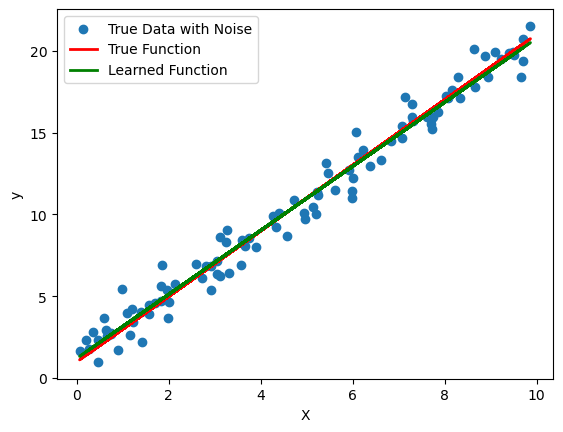

In [7]:
# Set random seed for reproducibility
torch.manual_seed(42)
np.random.seed(42)

# Define the true parameters
true_weight = 2.0
true_bias = 1.0

# Generate random input data
X = np.random.rand(100, 1) * 10.0

# Generate corresponding target values with some random noise
y_true = true_weight * X + true_bias
noise = np.random.normal(0, 1, size=(100, 1))
y_noisy = y_true + noise

# Convert NumPy arrays to PyTorch tensors
X_tensor = torch.tensor(X, dtype=torch.float32)
y_tensor = torch.tensor(y_noisy, dtype=torch.float32)

# Define a simple neural network with one linear layer
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.linear = nn.Linear(1, 1)

    def forward(self, x):
        return self.linear(x)

# Initialize the neural network
model = NeuralNetwork()

# Set the known parameters (weight and bias)
with torch.no_grad():
    model.linear.weight.fill_(true_weight)
    model.linear.bias.fill_(true_bias)

# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Training loop to fine-tune the parameters (optional)
num_epochs = 1000
for epoch in range(num_epochs):
    # Forward pass
    y_pred = model(X_tensor)

    # Compute the loss
    loss = criterion(y_pred, y_tensor)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Print the loss every 100 epochs
    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Plot the true data and the learned function
with torch.no_grad():
    y_pred_final = model(X_tensor).numpy()

plt.scatter(X, y_noisy, label='True Data with Noise')
plt.plot(X, y_true, color='red', linewidth=2, label='True Function')
plt.plot(X, y_pred_final, color='green', linewidth=2, label='Learned Function')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()


In [8]:

# torch.manual_seed(42)
# np.random.seed(42)

# # Define the true parameters
# true_weight = 2.0
# true_bias = 1.0

# # Generate random input data
# X = np.random.rand(100, 1) * 10.0

# # Generate corresponding target values with some random noise
# y_true = true_weight * X + true_bias
# noise = np.random.normal(0, 1, size=(100, 1))
# y_noisy = y_true + noise

# # Convert NumPy arrays to PyTorch tensors
# X_tensor = torch.tensor(X, dtype=torch.float32)
# y_tensor = torch.tensor(y_noisy, dtype=torch.float32)

# # Define a simple neural network with one linear layer
# class NeuralNetwork(nn.Module):
#     def __init__(self):
#         super(NeuralNetwork, self).__init__()
#         self.linear = nn.Linear(1, 1)

#     def forward(self, x):
#         return self.linear(x)

# # Function to calculate the confidence interval of parameters using bootstrap
# def calculate_bootstrap_ci(model, X, y, num_bootstrap_samples=100, confidence_level=0.95):
#     parameters = []

#     for _ in range(num_bootstrap_samples):
#         # Randomly sample with replacement
#         indices = np.random.choice(len(X), len(X), replace=True)
#         X_bootstrap = X[indices]
#         y_bootstrap = y[indices]

#         # Convert NumPy arrays to PyTorch tensors
#         X_bootstrap_tensor = torch.tensor(X_bootstrap, dtype=torch.float32)
#         y_bootstrap_tensor = torch.tensor(y_bootstrap, dtype=torch.float32)

#         # Initialize the neural network
#         model_bootstrap = NeuralNetwork()

#         # Set the known parameters (weight and bias)
#         with torch.no_grad():
#             model_bootstrap.linear.weight.fill_(true_weight)
#             model_bootstrap.linear.bias.fill_(true_bias)

#         # Define loss function and optimizer
#         criterion = nn.MSELoss()
#         optimizer = optim.SGD(model_bootstrap.parameters(), lr=0.01)

#         # Training loop
#         for _ in range(1000):
#             # Forward pass
#             y_pred = model_bootstrap(X_bootstrap_tensor)

#             # Compute the loss
#             loss = criterion(y_pred, y_bootstrap_tensor)

#             # Backward pass and optimization
#             optimizer.zero_grad()
#             loss.backward()
#             optimizer.step()

#         # Append the parameters to the list
#         parameters.append((model_bootstrap.linear.weight.item(), model_bootstrap.linear.bias.item()))

#     # Calculate the confidence interval of the parameters
#     weight_values = [param[0] for param in parameters]
#     bias_values = [param[1] for param in parameters]
#      # Calculate the standard deviation of the parameters
#     weight_std = np.std([param[0] for param in parameters])
#     bias_std = np.std([param[1] for param in parameters])
#     weight_ci = np.percentile(weight_values, [(1 - confidence_level) / 2 * 100, (1 + confidence_level) / 2 * 100])
#     bias_ci = np.percentile(bias_values, [(1 - confidence_level) / 2 * 100, (1 + confidence_level) / 2 * 100])

#     return weight_std, bias_std, weight_ci, bias_ci

# # Initialize the neural network
# model = NeuralNetwork()

# # # Set the known parameters (weight and bias)
# # with torch.no_grad():
# #     model.linear.weight.fill_(true_weight)
# #     model.linear.bias.fill_(true_bias)

# # Calculate the confidence interval of parameters using bootstrap
# weight_std, bias_std, weight_ci, bias_ci = calculate_bootstrap_ci(model, X, y_noisy)

# print(f'True Weight: {true_weight:.4f}')
# print(f'True Bias: {true_bias:.4f}')
# print(f'Standard Error of Weight: {weight_std:.4f}')
# print(f'Standard Error of Bias: {bias_std:.4f}')
# print(f'Confidence Interval of Weight: {weight_ci}')
# print(f'Confidence Interval of Bias: {bias_ci}')


# multiple parameters

In [9]:

torch.manual_seed(42)
np.random.seed(42)

true_weights = torch.tensor([[2.0, -1.0], [0.5, 1.5]])
true_biases = torch.tensor([1.0, -0.5])

# Generate random input data
X = torch.randn(100, 2)
# Generate corresponding target values with some random noise
y_true = X.matmul(true_weights.t()) + true_biases + 0.1 * torch.randn(100, 2)

# Convert tensors to NumPy arrays for visualization
X_np = X.numpy()
y_true_np = y_true.numpy()

class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.linear = nn.Linear(2, 2)

    def forward(self, x):
        return self.linear(x)

# Function to calculate the confidence interval of parameters using bootstrap
def calculate_bootstrap_ci(model, X, y, num_bootstrap_samples=100, confidence_level=0.95):
    parameters = []

    for _ in range(num_bootstrap_samples):
        # Randomly sample with replacement
        indices = np.random.choice(len(X), len(X), replace=True)
        X_bootstrap = X[indices]
        y_bootstrap = y[indices]

        X_bootstrap_tensor = torch.tensor(X_bootstrap, dtype=torch.float32)
        y_bootstrap_tensor = torch.tensor(y_bootstrap, dtype=torch.float32)

        model_bootstrap = NeuralNetwork()

        # Set the known parameters
        with torch.no_grad():
            model_bootstrap.linear.weight.copy_(true_weights)
            model_bootstrap.linear.bias.copy_(true_biases)

        criterion = nn.MSELoss()
        optimizer = torch.optim.SGD(model_bootstrap.parameters(), lr=0.01)


        for _ in range(1000):
            # Forward pass
            y_pred = model_bootstrap(X_bootstrap_tensor)
            loss = criterion(y_pred, y_bootstrap_tensor)
            # Backward pass and optimization
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

        # Append the parameters to the list
        parameters.append((model_bootstrap.linear.weight.detach().numpy().copy(), model_bootstrap.linear.bias.detach().numpy().copy()))

    # Calculate the confidence interval of the parameters
    weight_values = [param[0] for param in parameters]
    bias_values = [param[1] for param in parameters]

    weight_ci = np.percentile(weight_values, [(1 - confidence_level) / 2 * 100, (1 + confidence_level) / 2 * 100], axis=0)
    bias_ci = np.percentile(bias_values, [(1 - confidence_level) / 2 * 100, (1 + confidence_level) / 2 * 100], axis=0)

    return weight_ci, bias_ci

model = NeuralNetwork()
# Calculate the confidence interval of parameters using bootstrap
weight_ci, bias_ci = calculate_bootstrap_ci(model, X_np, y_true_np)

print(f'Confidence Interval of Weights:\n{weight_ci}')
print(f'Confidence Interval of Biases:\n{bias_ci}')


Confidence Interval of Weights:
[[[ 1.99744319 -1.02865421]
  [ 0.48818985  1.48528107]]

 [[ 2.02909304 -0.99318873]
  [ 0.52110039  1.51823438]]]
Confidence Interval of Biases:
[[ 1.00421411 -0.50809152]
 [ 1.04002737 -0.47308234]]


# 2

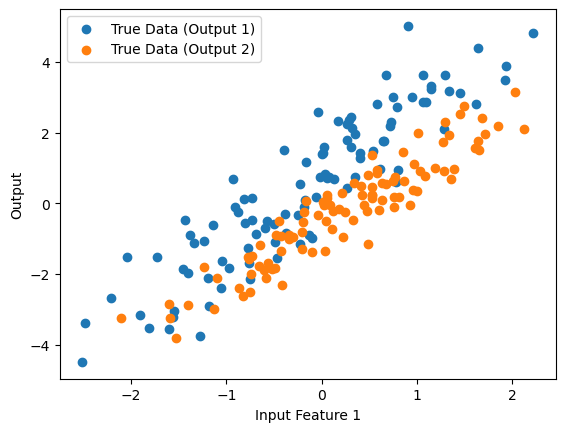

In [10]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np

# Set random seed for reproducibility
torch.manual_seed(42)
np.random.seed(42)

# Define the true parameters
true_weights = torch.tensor([[2.0, -1.0], [0.5, 1.5]])
true_biases = torch.tensor([1.0, -0.5])

# Generate random input data
X = torch.randn(100, 2)

# Generate corresponding target values with some random noise
y_true = X.matmul(true_weights.t()) + true_biases + 0.1 * torch.randn(100, 2)

# Convert tensors to NumPy arrays for visualization
X_np = X.numpy()
y_true_np = y_true.numpy()

# Plot the true data and the learned function
import matplotlib.pyplot as plt

plt.scatter(X_np[:, 0], y_true_np[:, 0], label='True Data (Output 1)')
plt.scatter(X_np[:, 1], y_true_np[:, 1], label='True Data (Output 2)')
plt.xlabel('Input Feature 1')
plt.ylabel('Output')
plt.legend()
plt.show()


In [11]:
# Define a simple neural network with multiple parameters
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.linear = nn.Linear(2, 2)

    def forward(self, x):
        return self.linear(x)

# Set random seed for reproducibility
torch.manual_seed(42)
np.random.seed(42)

# Convert NumPy arrays to PyTorch tensors
X_tensor = torch.tensor(X, dtype=torch.float32, requires_grad=True)
y_tensor = torch.tensor(y_true, dtype=torch.float32)
parameters = []
confidence_level = 0.95
# Initialize the neural network
model = NeuralNetwork()

# # Set the known parameters
# with torch.no_grad():
#     model.linear.weight.copy_(true_weights)
#     model.linear.bias.copy_(true_biases)

# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

# Training loop
for _ in range(1000):
    # Forward pass
    y_pred = model(X_tensor)

    # Compute the loss
    loss = criterion(y_pred, y_tensor)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

# Append the parameters to the list
parameters.append((model.linear.weight.detach().numpy().copy(), model.linear.bias.detach().numpy().copy()))

# Calculate the confidence interval of the parameters
weight_values = [param[0] for param in parameters]
bias_values = [param[1] for param in parameters]
print(weight_values)
print(bias_values)

[array([[ 2.0086868 , -1.0055554 ],
       [ 0.50608814,  1.4995965 ]], dtype=float32)]
[array([ 1.0182549 , -0.48938915], dtype=float32)]


/var/folders/m4/9m2trj8x7y92y0strz2yqc_m0000gn/T/ipykernel_14671/2404909150.py:15: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_tensor = torch.tensor(X, dtype=torch.float32, requires_grad=True)
/var/folders/m4/9m2trj8x7y92y0strz2yqc_m0000gn/T/ipykernel_14671/2404909150.py:16: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_tensor = torch.tensor(y_true, dtype=torch.float32)


In [12]:
loss = torch.sum((y_pred - y_true)**2,0)
print((y_pred - y_true)**2)
print('='*20)
print(loss)

tensor([[1.0731e-02, 7.3141e-04],
        [5.7294e-03, 2.7588e-03],
        [2.7317e-05, 3.4106e-02],
        [1.5647e-03, 3.5354e-03],
        [2.1064e-07, 7.7943e-03],
        [1.7079e-02, 7.6018e-03],
        [1.2740e-03, 3.2209e-06],
        [1.3728e-03, 6.0877e-03],
        [6.3179e-03, 7.3301e-04],
        [2.1952e-02, 6.5408e-04],
        [1.0808e-02, 6.0621e-04],
        [3.9341e-06, 7.6922e-04],
        [3.2293e-02, 4.2935e-02],
        [7.0518e-03, 1.5040e-02],
        [2.2406e-03, 9.8040e-04],
        [5.2274e-04, 9.5276e-04],
        [3.9023e-05, 1.0526e-02],
        [3.6553e-05, 2.6527e-04],
        [1.6740e-03, 1.9973e-03],
        [1.1219e-03, 2.1556e-04],
        [8.2163e-03, 2.1808e-02],
        [1.1029e-02, 3.4123e-03],
        [5.7681e-03, 2.4598e-03],
        [6.6442e-03, 3.4840e-04],
        [1.7979e-03, 3.2580e-02],
        [7.8150e-03, 9.4590e-03],
        [5.7911e-03, 1.4997e-03],
        [1.3604e-04, 6.6536e-06],
        [2.1653e-02, 3.6085e-02],
        [1.019

In [13]:
# Set random seed for reproducibility
torch.manual_seed(42)
np.random.seed(42)
bias_to_differentiate = model.linear.bias
bias_to_differentiate.requires_grad_(True)
partial_derivative_wrt_bias = bias_to_differentiate.grad

for i in range(len(y_true[1])):
    print(f"layer:{i+1}")
    print('='*20)
    all_gradients = [param.grad[i] for param in model.parameters()]
    grad_vector = torch.cat([g.contiguous().view(-1) for g in all_gradients])
    grad_vector = grad_vector.view(-1, 1)
    for param, gradient in zip(model.parameters(), all_gradients):
        print(f"Gradient of loss w.r.t. {param[i]}:")
        print(gradient)
        print()
    print('='*20)
    print(grad_vector)
    G=torch.transpose(grad_vector,0,1)
    F=torch.matmul(grad_vector,G)
    H=-torch.inverse(F)
    w=torch.mm(G,H)
    w=torch.mm(w,grad_vector)
    sigma_epsilon_squared = loss[i]/len(y_true)
    sigma=torch.sqrt(w*sigma_epsilon_squared)
    sigma=w*sigma_epsilon_squared
    print(w)
    Z_0025 = norm.ppf(1 - 0.025 / 2)
    ci=sigma*Z_0025
    print('='*20)
    print(f"fisher information matrix:{F}")
    print(f"Inverse hessian:{H}")
    print(f"Confidence interval:{ci}")


layer:1
Gradient of loss w.r.t. tensor([ 2.0087, -1.0056], grad_fn=<SelectBackward0>):
tensor([-0.0009,  0.0021])

Gradient of loss w.r.t. 1.0182548761367798:
tensor(-0.0017)

tensor([[-0.0009],
        [ 0.0021],
        [-0.0017]])
tensor([[-0.4605]])
fisher information matrix:tensor([[ 8.0897e-07, -1.9138e-06,  1.5634e-06],
        [-1.9138e-06,  4.5273e-06, -3.6985e-06],
        [ 1.5634e-06, -3.6985e-06,  3.0213e-06]])
Inverse hessian:tensor([[-1.4089e+13,  9.4659e+11,  8.4492e+12],
        [-2.4189e+12,  4.5858e+12,  6.8653e+12],
        [ 4.3295e+12,  5.1238e+12,  4.0318e+12]])
Confidence interval:tensor([[-0.0084]], grad_fn=<MulBackward0>)
layer:2
Gradient of loss w.r.t. tensor([0.5061, 1.4996], grad_fn=<SelectBackward0>):
tensor([ 0.0003, -0.0007])

Gradient of loss w.r.t. -0.4893891513347626:
tensor(0.0006)

tensor([[ 0.0003],
        [-0.0007],
        [ 0.0006]])
tensor([[7.7725]])
fisher information matrix:tensor([[ 8.3279e-08, -2.1449e-07,  1.7107e-07],
        [-2.1449e-

In [14]:
def CI(model,loss):
    Z_0025 = norm.ppf(1 - 0.025 / 2)
    all_gradients = [param.grad for param in model.parameters()]
    # Flatten the gradient into a vector
    grad_vector = torch.cat([g.contiguous().view(-1) for g in all_gradients])
    grad_vector = grad_vector.view(1, -1)
    G=torch.transpose(grad_vector,0,1)
    F=torch.matmul(grad_vector,G)
    H=-torch.inverse(F)
    w=torch.mm(G,H)
    w=torch.mm(w,grad_vector)
    sigma_epsilon_squared = torch.mean(loss)
    sigma=torch.sqrt(w*sigma_epsilon_squared)
    ci=sigma*Z_0025

In [16]:

# X = torch.randn(100, 2, requires_grad=True)  # 100 samples, 2 input features

# # Forward pass to get the model predictions
# y_pred = model(X)

# loss = torch.sum((y_pred - y_true)**2,0)

# # Calculate the gradient with respect to the parameters
# gradient = torch.autograd.grad(loss, model.parameters(), create_graph=True)
# grad_vector = torch.cat([g.contiguous().view(-1) for g in gradient])
# for name, params in model.named_parameters():
#     print(f'Layer: {name}, {params}, Size: {params.size()}')
# print('='*20)
# print(gradient)

In [17]:
# Compute the diagonal approximation using the Fisher Information Matrix
fisher_diagonal = []
 
for name, params in model.named_parameters():
    print(f'Layer: {name}, {params}, Size: {params.size()}')
    fisher_diagonal.append(torch.square(params.grad))
    
print("Diagonal Fisher Information Matrix:")
print(fisher_diagonal)

Layer: linear.weight, Parameter containing:
tensor([[ 2.0087, -1.0056],
        [ 0.5061,  1.4996]], requires_grad=True), Size: torch.Size([2, 2])
Layer: linear.bias, Parameter containing:
tensor([ 1.0183, -0.4894], requires_grad=True), Size: torch.Size([2])
Diagonal Fisher Information Matrix:
[tensor([[8.0897e-07, 4.5273e-06],
        [8.3279e-08, 5.5245e-07]]), tensor([3.0213e-06, 3.5139e-07])]


In [18]:
sigma_epsilon_squared = torch.mean(loss)
print(sigma_epsilon_squared)

tensor(0.8215, grad_fn=<MeanBackward0>)


In [19]:
# confidence_interval = torch.sqrt(sigma_epsilon_squared * gradient @ (-(1/fisher_diagonal)) @ gradient)

In [20]:
# Function to compute the confidence interval
def compute_confidence_interval(model, x, y, h):
    # Input:
    # 'x' is the input data, 'y' is the observed values, 'h' is the leverage
    model.eval()

    # Forward pass to get predictions
    predictions = model(x)

    # Compute the residuals
    residuals = y - predictions

    # Compute the noise variance (sigma_epsilon^2)
    sigma_epsilon_squared = torch.mean(residuals**2 / (1 - h)**2) / (len(y) - 2)

    # Compute the Fisher Information Matrix (FIM) components
    optimizer = optim.SGD(model.parameters(), lr=0.01)  # Choose an appropriate optimizer
    optimizer.zero_grad()
    loss = nn.MSELoss()(predictions, y)
    loss.backward()

    # Get the gradient vector g(x)
    g = torch.cat([param.grad.view(-1) for param in model.parameters()])

    # Compute the negative FIM
    H_inverse = -torch.linalg.pinv(torch.autograd.functional.hessian(loss, model.parameters()))

    # Compute the confidence interval
    z_value = 0.025  # For a 95% confidence interval
    confidence_interval = z_value * torch.sqrt(sigma_epsilon_squared * g @ H_inverse @ g)

    # Compute the upper and lower bounds
    upper_bound = predictions + confidence_interval
    lower_bound = predictions - confidence_interval

    return upper_bound, lower_bound

# achreive

In [21]:
for inputs, labels in train_loader:
    Z_0025 = norm.ppf(1 - 0.025 / 2)
    c = torch.tensor([])
    c_p = torch.tensor([])
    outputs = model(inputs.view(-1, 28 * 28))
    mini, _ = torch.min(outputs.data, 1)
    re_outputs = outputs-mini.view(-1, 1)
    re_outputs_p = re_outputs/torch.sum(re_outputs,1).view(-1, 1)#regularization probability
    _, predicted = torch.max(outputs.data, 1)
    i+=1
    num_elements = labels.numel()
    identity_matrix = torch.eye(10)
    re_labels_p = identity_matrix[labels] #set probability of labels
    mu = torch.mean(re_outputs_p,dim=0)#mean of estimator of y
    loss = torch.sum((re_outputs_p-re_labels_p)**2,1)/2
    y_p = torch.mean(re_labels_p,dim=0)
    loss_p = torch.sum((re_outputs_p-y_p)**2,1)/2
    for i in range(10):
        print(f"number:{i}")
        print('='*20)
        all_gradients = [param.grad[i] for param in model.parameters()]
        grad_vector = torch.cat([g.contiguous().view(-1) for g in all_gradients])
        grad_vector = grad_vector.view(-1, 1)
#         for param, gradient in zip(model.parameters(), all_gradients):
#             print(f"Gradient of loss w.r.t. {param[i]}:")
#             print(gradient)
#             print()
#         print('='*20)
#         print(grad_vector)
        G=torch.transpose(grad_vector,0,1)
        F=torch.matmul(grad_vector,G)
        H=torch.pinverse(F) #use the pseudo-inverse???
        w=torch.mm(G,H)
        w=torch.mm(w,grad_vector)
        sigma_epsilon_squared = loss[i]/len(labels)
        sigma=torch.sqrt(w*sigma_epsilon_squared)
        sigma_epsilon_squared_p = loss_p[i]/len(labels)
        sigma_p=torch.sqrt(sigma_epsilon_squared_p)
        ci=sigma*Z_0025
        ci_p=sigma_p*Z_0025
        CI= torch.cat([mu[i] - ci, mu[i] + ci],1)
        c = torch.cat([c, CI.unsqueeze(0)], 1) #combing the CI as squence
        ci_p_list=[mu[i] - ci_p, mu[i] + ci_p]
        ci_p_list=[tensor.view(1, 1) for tensor in ci_p_list]
        CI_p= torch.cat(ci_p_list,1)
        c_p = torch.cat([c_p, CI_p.unsqueeze(0)], 1) #combing the CI as squence
#         print('='*20)
#         print(f"fisher information matrix:{F}")
#         print(f"Inverse hessian:{H}")
#         print(f"mean of estimator probability:{mu[i]}")
        print(f"interva size:{ci}")
        print(f"p interva size:{ci_p}")
#         print(c)
    break

NameError: name 'train_loader' is not defined